In [12]:
import pandas as pd

notas = pd.read_csv('ratings.csv')

notas.columns = ['usuarioId', 'filmeId', 'nota', 'tempo']

notas.head()

# Únicos valores que existem
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [13]:
# Mostra o número de vezes que a nota existe na coluna
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

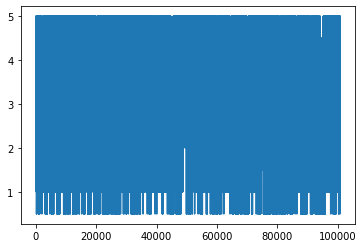

In [14]:
# Mostra os dados de número de avaliações e a nota,
# como o número de avaliações é muito grande o gráfico é de difícil compreensão 
notas.nota.plot()

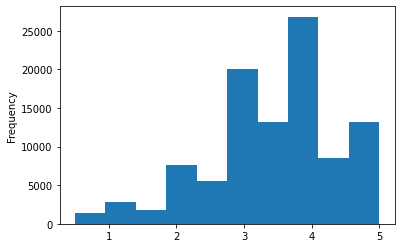

In [15]:
# Gráfico do tipo histograma fica melhor a compreensão
notas.nota.plot(kind='hist')

In [17]:
# Descreve as principais medidas dos dados
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


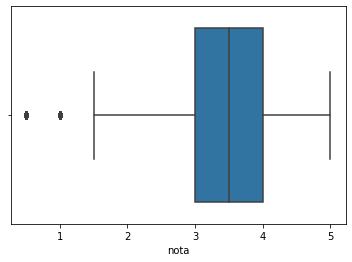

In [18]:
# Cria um boxplot dos dados
# O retângulo informa cerca de 50% das avaliações e a linha central a mediana
# De 0 até 1.5 são as notas menos usadas
# Na linha do 4 até o 5 representa 25% das avaliações

import seaborn as sns
sns.boxplot(notas.nota)

In [19]:
## Consulta SQL
notas.query("filmeId==1")

,usuarioId,filmeId,nota,tempo
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [29]:
# Retorna uma tabela com dados da coluna filmeId
medias_por_filme = notas.groupby("filmeId").mean()
medias_por_filme.head()

,usuarioId,nota,tempo
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08


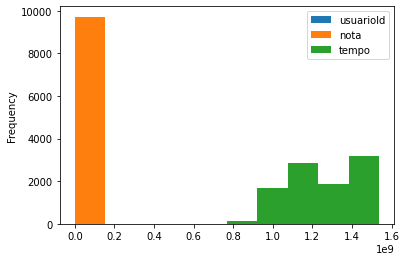

In [31]:
# Criando histograma a partir da tabela anterior
medias_por_filme.plot(kind="hist")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


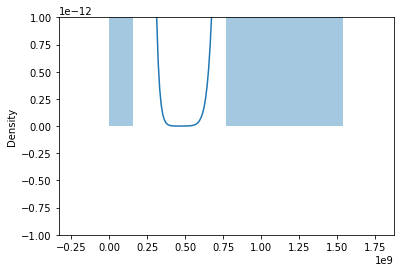

In [25]:
sns.distplot(medias_por_filme, bins=10)


Text(0.5, 1.0, 'Histograma das médias dos filmes')

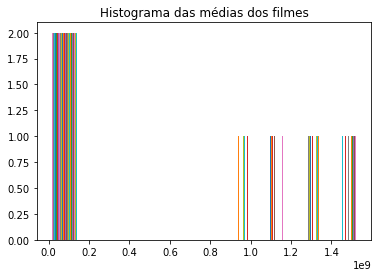

In [32]:
# Criando histograma com matploit
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")